### Laboratorio Regularización

#### Instrucciones

Para esta actividad generarás una regresión lineal con regularización utilizando **ElasticNet** a través de la implementación de sklearn **ElasticSearchCV**.

Cuentas con los datos de precios de vivienda de Boston que tiene las siguientes variables: 

* CRIM      per capita crime rate by town
* ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS     proportion of non-retail business acres per town
* CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* NOX       nitric oxides concentration (parts per 10 million)
* RM        average number of rooms per dwelling
* AGE       proportion of owner-occupied units built prior to 1940
* DIS       weighted distances to five Boston employment centres
* RAD       index of accessibility to radial highways
* TAX      full-value property-tax rate per \$10,000
* PTRATIO  pupil-teacher ratio by town
* B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT    % lower status of the population
* MEDV     Median value of owner-occupied homes in $1000's


El objetivo consiste en predecir la mediana del precio de una casa: MEDV

Puedes encontrar la API de referencia de ElasticNet [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html). 

Puedes encontrar la API de referencia de ElasticNetCV [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNetCV.html#sklearn.linear_model.ElasticNetCV)

1. Para este laboratorio ocupa la semilla **200822**.

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns

In [7]:
np.random.seed(200822)

In [8]:
boston = pd.read_csv("boston.csv")

2. Genera una gráfica **pairplot** de seaborn de todas las variables del conjunto de datos

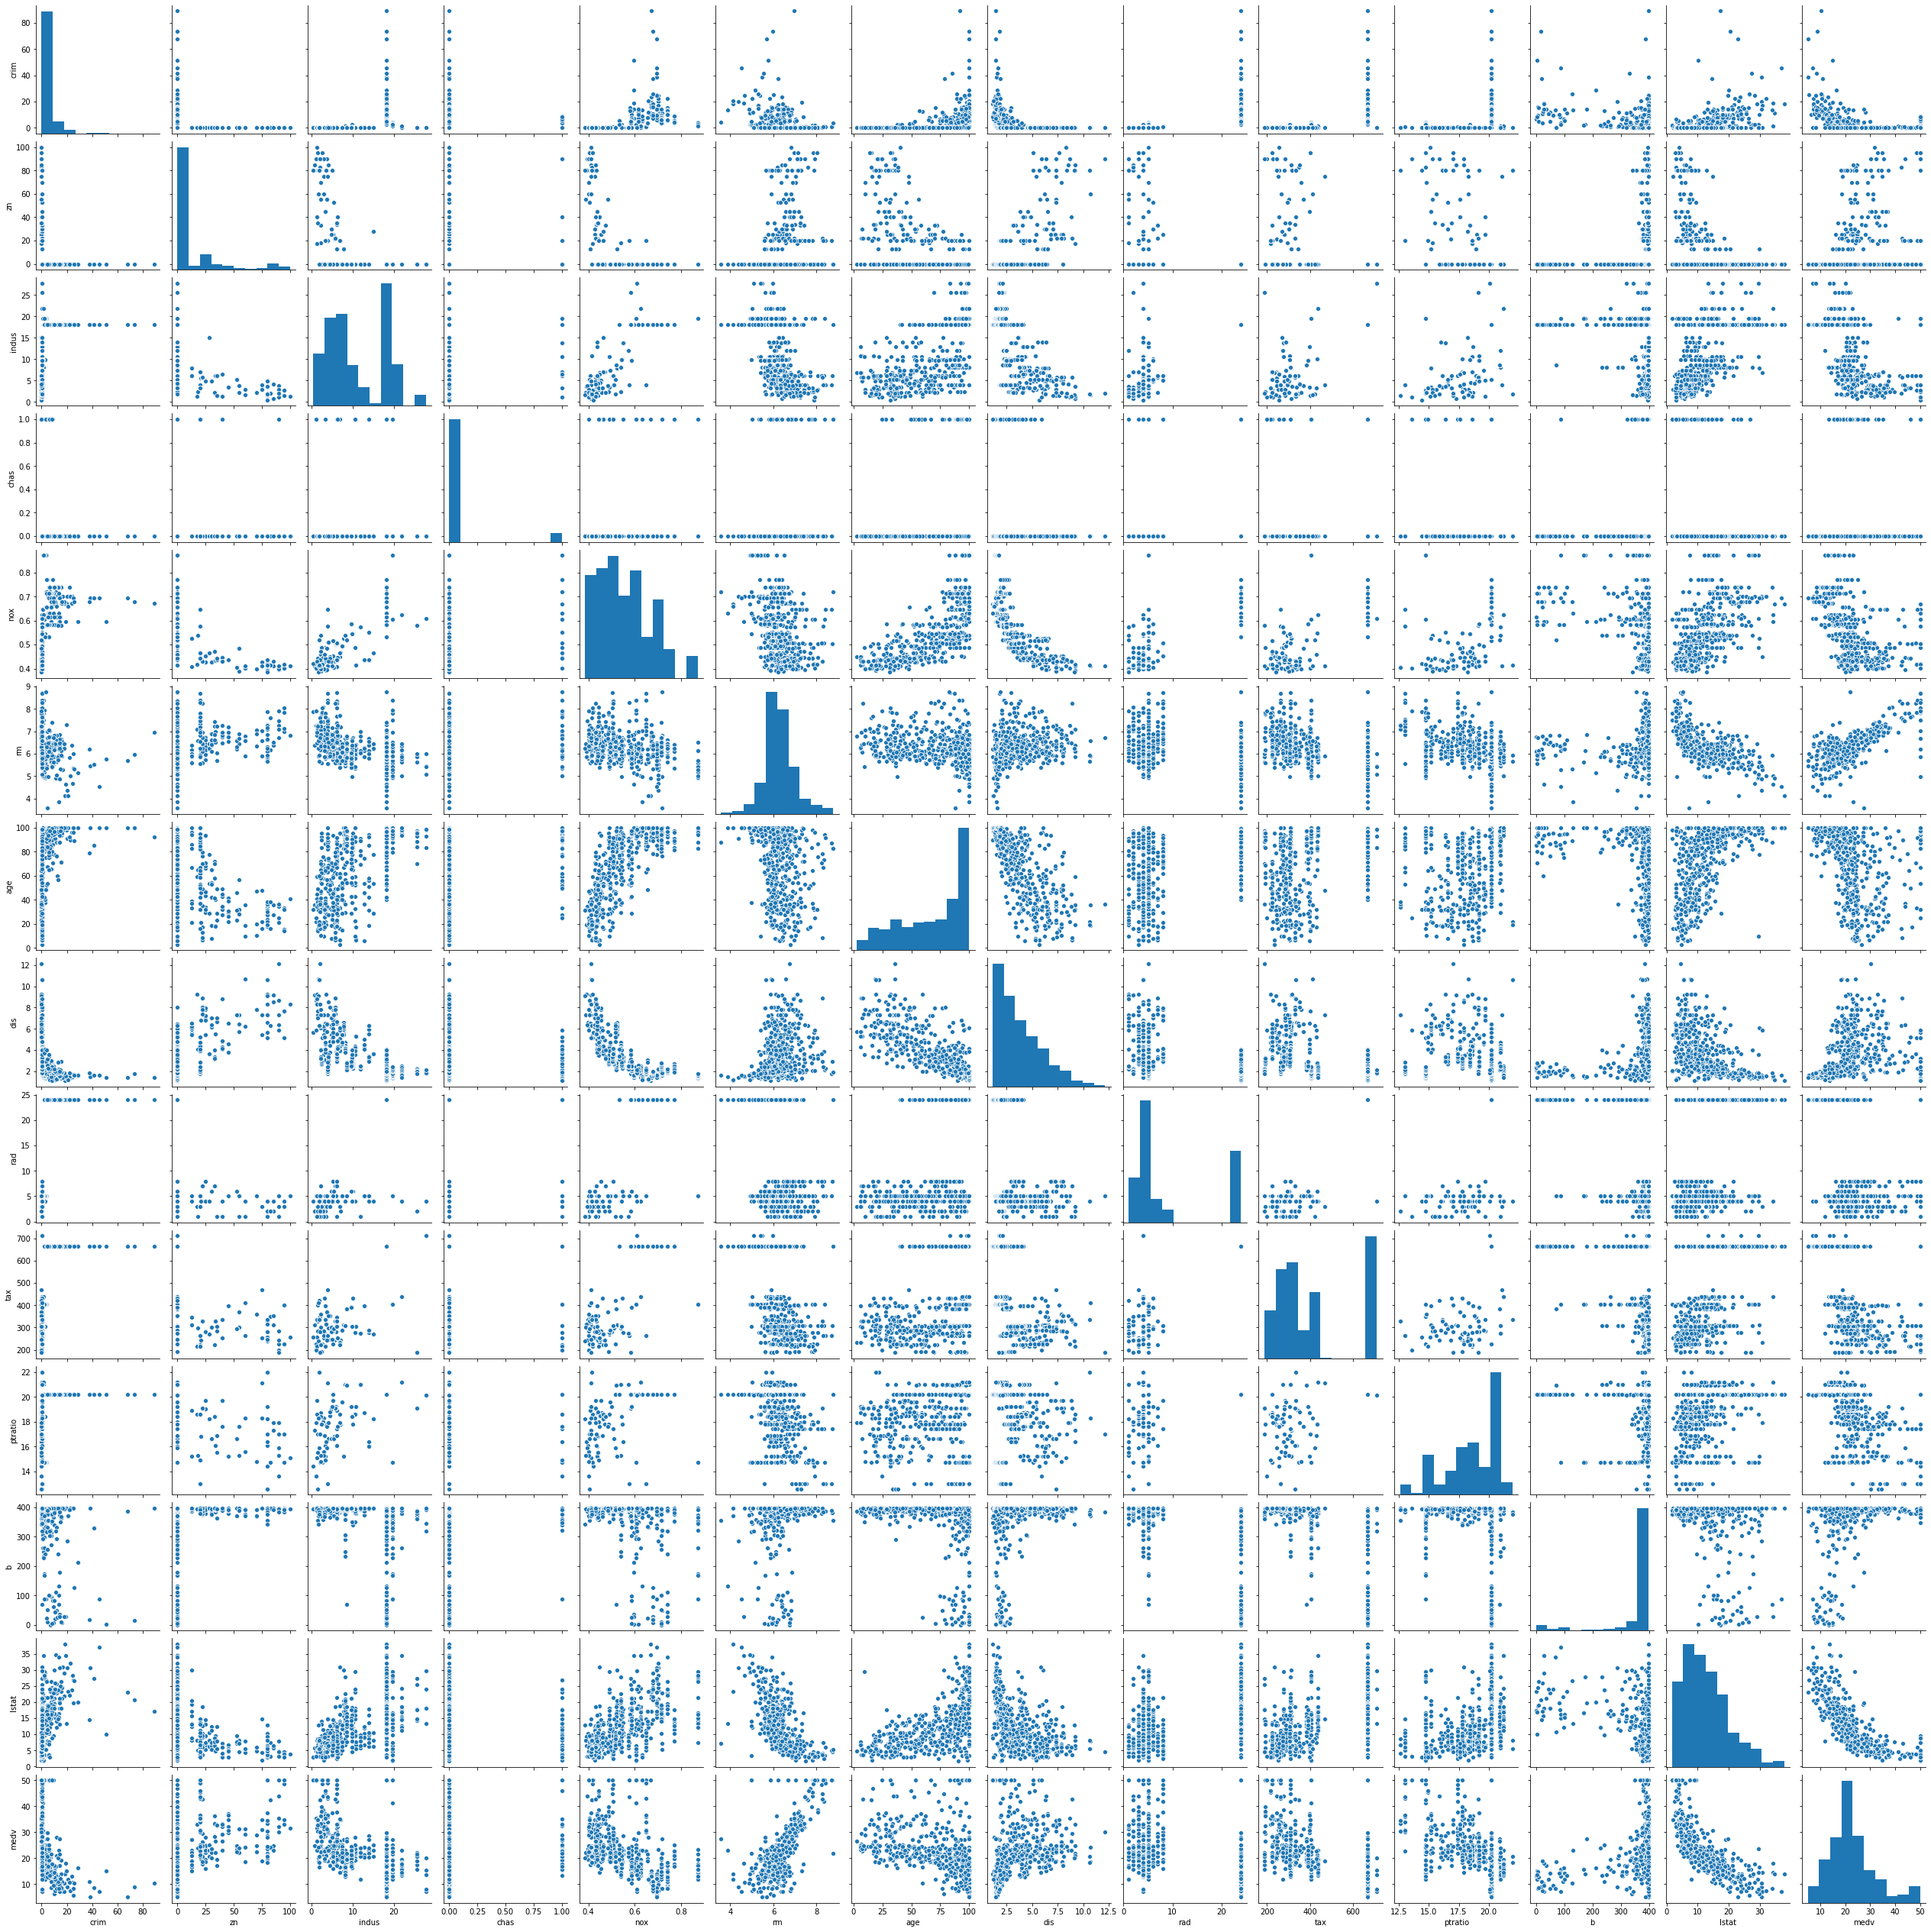

In [30]:
sns.pairplot(boston)

3. Separa tus variables en variables explicativas y variable *target* guardando las primeras en la variable `X` y la segunda en la variable `y`.

In [9]:
X = boston[['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','b','lstat']]
y = boston[['medv']]

4. Separa el conjunto de datos en *train* y *test*, utilizando el 25% de los datos en tu conjunto de pruebas.

In [14]:
from sklearn.model_selection import train_test_split

# train test split
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.25, random_state=111)
print("\nX_train, y_train: ", (X_train.shape, y_train.shape))
print("\nX_test, y_test: ", (X_test.shape, y_test.shape))


X_train, y_train:  ((379, 13), (379, 1))

X_test, y_test:  ((127, 13), (127, 1))


5. Utiliza el objeto ElasticNetCV con los siguientes hiperparámetros: 
    + `l1_ratio`: 0.2, 0.4, 0.6, 0.8, 0.9 
    + `alphas`: 0.1, 1.0, 10.0
    + `cv`: 10

In [15]:
from sklearn.linear_model import ElasticNetCV

In [16]:
en = ElasticNetCV(cv=10, l1_ratio= [0.2, 0.4, 0.6, 0.8, 0.9], alphas= [0.1,1.0,10])

In [17]:
m1 = en.fit(X_train, y_train)

/home/silil/.pyenv/versions/iexe/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


6. Con tu modelo entrenado, contesta las siguientes preguntas:

    a. Qué valor de `alpha` quedó seleccionado

In [18]:
m1.alpha_

0.1

 b. Qué valor de `l1_ratio` fue seleccionado

In [19]:
m1.l1_ratio_

0.2

c. Qué coeficientes tienen tus variables predictivas

In [21]:
m1.coef_

array([-0.10269457,  0.05391184, -0.05799801,  0.80067748, -0.28156261,
        2.70161639, -0.01693315, -1.18626056,  0.26048913, -0.01224728,
       -0.82175536,  0.01119246, -0.6139607 ])

d. Qué coeficiente tiene tu beta cero

In [22]:
m1.intercept_

33.13818898622442

e. Cuáles son las 3 variables que aportan **menos** información al problema de predecir el precio de la casa

In [23]:
X.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat'],
      dtype='object')

In [24]:
X.columns[[11,9,6]]

Index(['b', 'tax', 'age'], dtype='object')

In [25]:
df_info = pd.DataFrame({'feature': X.columns.values, 
                       'info': m1.coef_})

In [33]:
df_info.sort_values(by='info')

,feature,info
7,dis,-1.186261
10,ptratio,-0.821755
12,lstat,-0.613961
4,nox,-0.281563
0,crim,-0.102695
2,indus,-0.057998
6,age,-0.016933
9,tax,-0.012247
11,b,0.011192
1,zn,0.053912


f. Cuáles son las 3 variables que aportan **más** información al problema de predecir el precio de la casa

In [34]:
X.columns[[5,7,10]]

Index(['rm', 'dis', 'ptratio'], dtype='object')

7. Utilizando el mejor modelo encontrado por `ElasticNetCV` realiza las predicciones de los precios de las casas que forman parte del conjunto de pruebas.  

In [35]:
predicted = m1.predict(X_test)

8. Calcula el MAE y RMSE de las predicciones

In [43]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [37]:
mae = mean_absolute_error(y_test, predicted)
mae

3.7003441020631134

In [38]:
rmse = mean_squared_error(y_test, predicted, squared=False)
rmse

5.206172494037382

9. Genera una gráfica con los residuales de tus predicciones. 

In [57]:
y_test

,medv
93,25.0
223,30.1
39,30.8
122,20.5
203,48.5
...,...
192,36.4
342,16.5
480,23.0
414,7.0


In [58]:
residuals = y_test.medv - predicted

In [63]:
residuals

93     -3.985946
223     1.096101
39     -1.560834
122     1.220555
203     7.658307
         ...    
192     3.361279
342    -6.683722
480     0.609597
414    11.477057
2       4.770126
Name: medv, Length: 127, dtype: float64

In [59]:
a = predicted.reshape(residuals.shape[0],)

In [64]:
df_residuals = pd.DataFrame({'y_test': y_test['medv'], 'predicted': a, 
                             'residuals': residuals})

<AxesSubplot:xlabel='predicted', ylabel='residuals'>

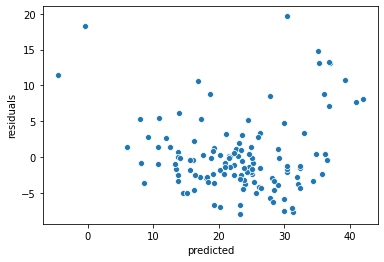

In [65]:
sns.scatterplot(x='predicted', y='residuals', data=df_residuals)

10. Genera una gráfica de QQplot
    * ¿tus residuales siguen una distribución normal? No
    * ¿se cumple con la suposición de linealidad? No

In [66]:
import scipy.stats as stats
import pylab

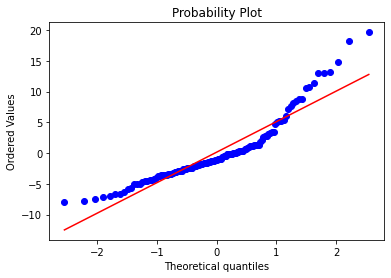

In [68]:
stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()